# *TELECOM CUSTOMER CHURN*

## IMPORT LIBRARIES 

In [3]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

In [4]:
warnings.filterwarnings('ignore')

## IMPORT DATASET 

In [6]:
tc = pd.read_csv("Customer Churn.csv")

In [7]:
pd.set_option('display.max_columns',None)

In [8]:
tc.head(2)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No


#### INFORMATION ABOUT COLUMNS

In [9]:
tc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


#### SHAPE OF THE DATASET

In [10]:
tc.shape

(7043, 21)

#### CHECKING NULL VALUES

In [11]:
tc.isnull().mean()*100   # no null 

customerID          0.0
gender              0.0
SeniorCitizen       0.0
Partner             0.0
Dependents          0.0
tenure              0.0
PhoneService        0.0
MultipleLines       0.0
InternetService     0.0
OnlineSecurity      0.0
OnlineBackup        0.0
DeviceProtection    0.0
TechSupport         0.0
StreamingTV         0.0
StreamingMovies     0.0
Contract            0.0
PaperlessBilling    0.0
PaymentMethod       0.0
MonthlyCharges      0.0
TotalCharges        0.0
Churn               0.0
dtype: float64

### Handling Missing Values and Data Type

In the dataset, the TotalCharges column contained some blank values, which were considered missing data. To ensure accurate analysis, these blank values were treated by replacing them with zeros. Since the column was originally of the object data type, it was necessary to convert it to a float data type after handling the missing values. This conversion allows for proper numerical operations and statistical analysis on the TotalCharges column.

In [12]:
tc[tc['TotalCharges']==' ']

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [13]:
tc['TotalCharges'] = tc['TotalCharges'].replace(' ','0')

In [14]:
tc['TotalCharges'] = tc['TotalCharges'].astype('float')

In [15]:
tc['TotalCharges'].dtype

dtype('float64')

In [17]:
tc.duplicated().sum()

0

In [18]:
tc['customerID'].duplicated().sum() # here check the unique column which nature is unique 

0

In [19]:
tc['customerID'].drop_duplicates(inplace = True)

## MAPPING

By using the tc.describe() function, I observed that the SeniorCitizen column contains values in binary form, specifically 1 and 0. To make the data more readable and meaningful, I mapped the value 1 to "Yes" and 0 to "No". This transformation improves the interpretability of the data, especially during analysis and visualization.

In [16]:
tc.describe() # here we saw we have to change secnior citizen  

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.734304
std,0.368612,24.559481,30.090047,2266.794470
min,0.000000,0.000000,18.250000,0.000000
25%,0.000000,9.000000,35.500000,398.550000
50%,0.000000,29.000000,70.350000,1394.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


In [20]:
tc['SeniorCitizen'].value_counts()

SeniorCitizen
0    5901
1    1142
Name: count, dtype: int64

In [21]:
tc['SeniorCitizen'] = tc['SeniorCitizen'].map({1:'YES',0:'NO'})

In [91]:
tc['SeniorCitizen'].value_counts()

SeniorCitizen
NO     5901
YES    1142
Name: count, dtype: int64

## COUNT OF CHURN CUSTOMER

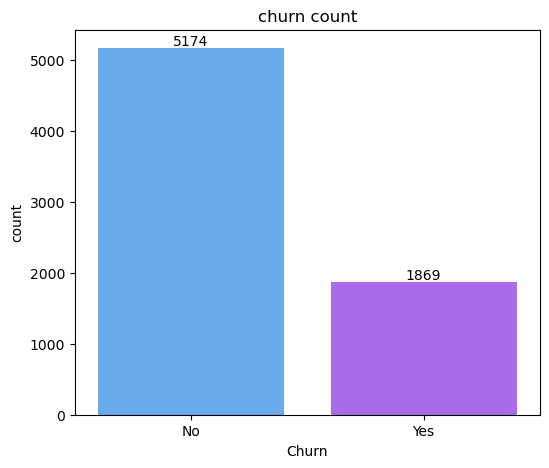

In [23]:
plt.figure(figsize=(6,5))
ax = sns.countplot(x ='Churn' , data = tc ,palette='cool')
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])

plt.title('churn count')
plt.show()

A majority of customers (5174) have not churned.

A smaller portion (1869) have churned.

## PERCENTAGE OF CHURN CUSTOMER

In [24]:
pei = tc.groupby('Churn').agg({'Churn':'count'})

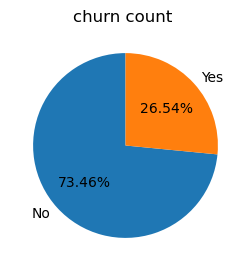

In [25]:
plt.figure(figsize=(5,3))
plt.pie(pei['Churn'],startangle=90,labels=pei.index,autopct="%1.2f%%")
plt.title('churn count ')

plt.show()

The plot shows that only 26.5% of customers have churned, while 73.5% have remained with the company.

Is it a good sign?

✅ Good Sign: Yes, it's relatively good that the majority of customers are retained.

⚠️ But: A churn rate of 26.5% is still significant — losing more than 1 in 4 customers is not ideal in most industries.

## Gender-wise Churn

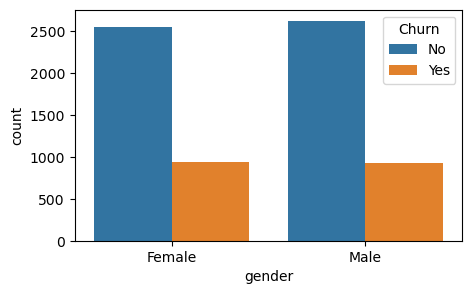

In [26]:
plt.figure(figsize=(5,3))
sns.countplot(data=tc,x=tc['gender'],hue=tc['Churn'])

plt.show()

the plot shows that churn is happening equally across genders

That means male and female customers are leaving (churning) at about the same rate, so gender doesn’t seem to be a factor influencing churn in this data.

## SeniorCitizen-wise Churn

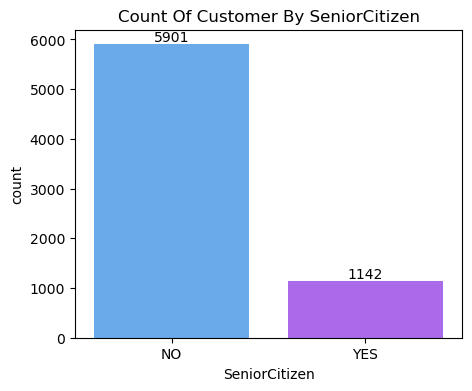

In [27]:
plt.figure(figsize=(5,4))
ax = sns.countplot(x ='SeniorCitizen' , data = tc ,palette='cool')
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])

plt.title('Count Of Customer By SeniorCitizen')
plt.show()

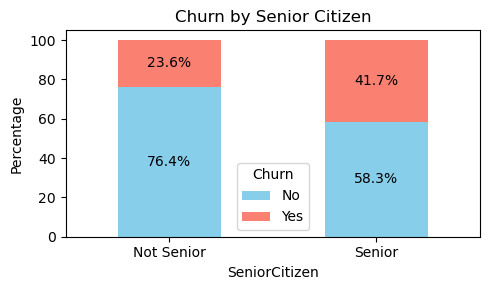

In [28]:

# Step 1: Create count data
count_data = tc.groupby(['SeniorCitizen', 'Churn']).size().unstack(fill_value=0)

# Step 2: Convert to percentages
percent_data = count_data.div(count_data.sum(axis=1), axis=0) * 100

# Step 3: Plot
ax = percent_data.plot(kind='bar', stacked=True, figsize=(5, 3), color=['skyblue', 'salmon'])

# Step 4: Add percentage labels without loops
# Get bar positions
x = [p.get_x() + p.get_width() / 2 for p in ax.patches[:len(percent_data)]]
y_no = percent_data['No'] / 2
y_yes = percent_data['No'] + percent_data['Yes'] / 2

# Add labels
for xi, yi, label in zip(x, y_no, percent_data['No']):
    ax.text(xi, yi, f'{label:.1f}%', ha='center', va='center', color='black')

for xi, yi, label in zip(x, y_yes, percent_data['Yes']):
    ax.text(xi, yi, f'{label:.1f}%', ha='center', va='center', color='black')

# Step 5: Final touches
ax.set_xticklabels(['Not Senior', 'Senior'], rotation=0)
plt.ylabel("Percentage")
plt.title("Churn by Senior Citizen")
plt.legend(title="Churn")
plt.tight_layout()
plt.show()


The plot indicates that senior citizens are more likely to churn than non-senior customers.

## CUSTOMER CHURN OVER TENURE

In [30]:
print('maximum tenure:-',tc['tenure'].max())
print('minimum tenure:-',tc['tenure'].min())

maximum tenure:- 72
minimum tenure:- 0


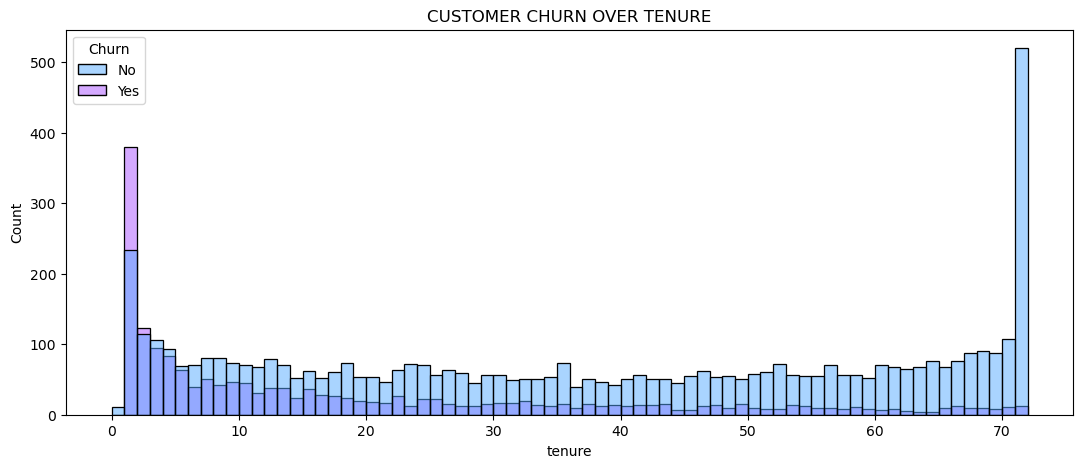

In [31]:
plt.figure(figsize=(13,5))
sns.histplot(data=tc,x=tc['tenure'],bins=72,hue=tc['Churn'],palette='cool')
plt.title('CUSTOMER CHURN OVER TENURE')
plt.show()

##### "Churn is more common among new customers, whereas long-term users tend to remain with the service."

## CHURN BY CONTRACT TYPE

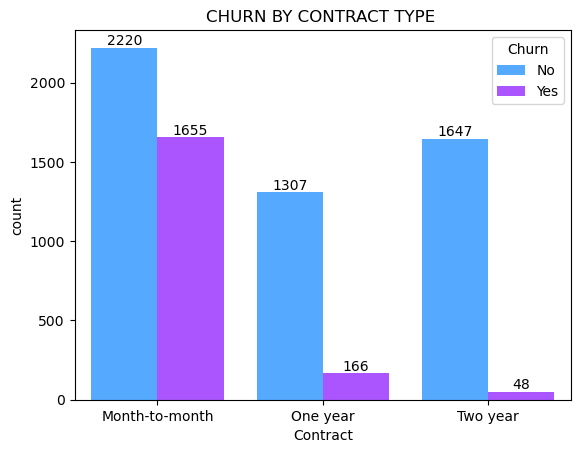

In [34]:
ax = sns.countplot(data=tc,x=tc['Contract'],hue=tc['Churn'],palette='cool',saturation=100)
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
plt.title('CHURN BY CONTRACT TYPE ')
plt.show()

##### Customers on month-to-month contracts exhibit a higher churn rate than those on one-year or two-year contracts.

# SERVICES BY THE COMPANY

In [37]:
tc.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

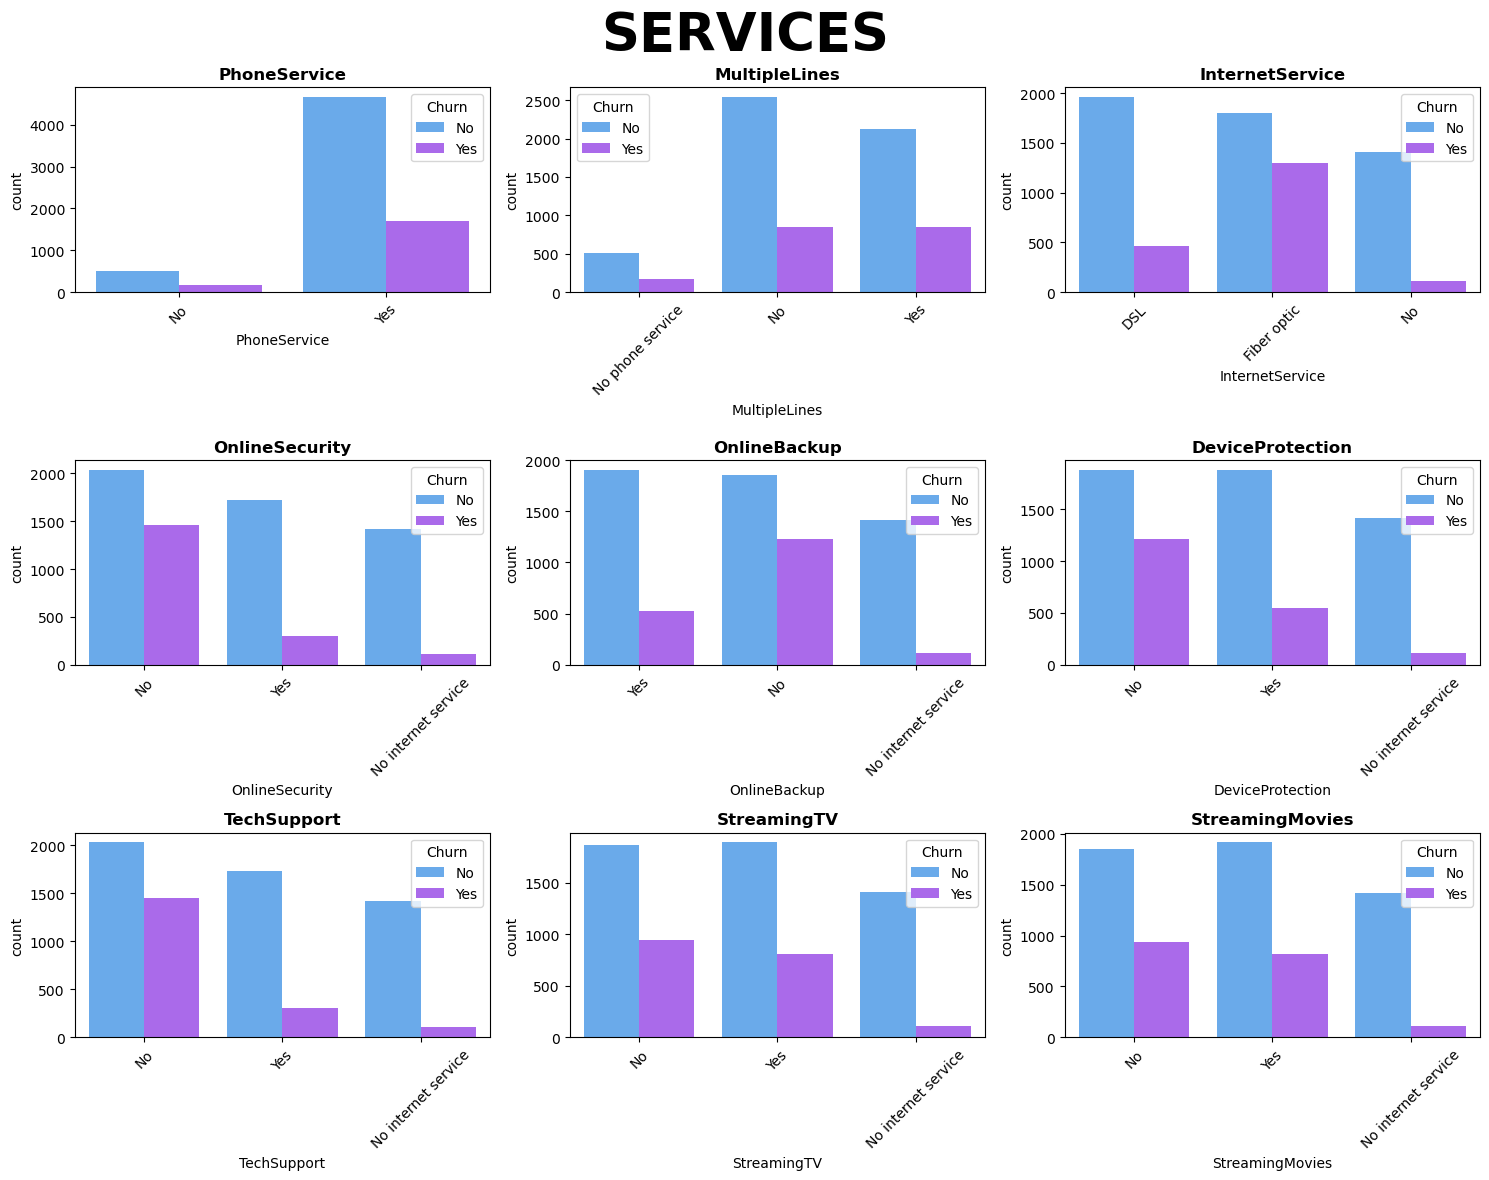

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns

cols = ['PhoneService', 'MultipleLines', 'InternetService',
        'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
        'TechSupport', 'StreamingTV', 'StreamingMovies']

# Set up the subplot grid: 3 rows x 3 cols (for 9 plots)
fig, axes = plt.subplots(3, 3, figsize=(15, 12))
axes = axes.flatten()

for i, col in enumerate(cols):
    sns.countplot(data=tc, x=col, ax=axes[i], palette='cool',hue=tc['Churn'])
    axes[i].set_title(col,fontweight='bold')
    axes[i].tick_params(axis='x', rotation=45)
plt.suptitle("SERVICES", fontsize=38, fontweight='bold',)
plt.tight_layout()
plt.show()


📱 Phone Service:
Most customers have phone service.

Customers with phone service are more likely to churn than those without, though those without service are very few.

📶 Multiple Lines:
Churn is higher among customers with no multiple lines or multiple lines, but less among those with "No phone service" (rare case).

🌐 Internet Service:
Fiber optic users churn the most among internet types.

Customers with no internet service churn the least — likely because they use fewer services.

🔐 Online Security:
Customers without online security churn more.

Those with online security churn less — suggesting security might help retain users.

💾 Online Backup:
Similar to online security: churn is higher among those who don’t have backup.

Customers with backup are more loyal.

🛡️ Device Protection:
Churn is higher for those without device protection.

Protection users seem more likely to stay.

🛠️ Tech Support:
A strong pattern: customers without tech support churn more.

Tech support availability appears to reduce churn.

📺 Streaming TV & 🎬 Streaming Movies:
In both services, customers who don’t use the service churn more.

Those with access to entertainment services are more likely to stay.


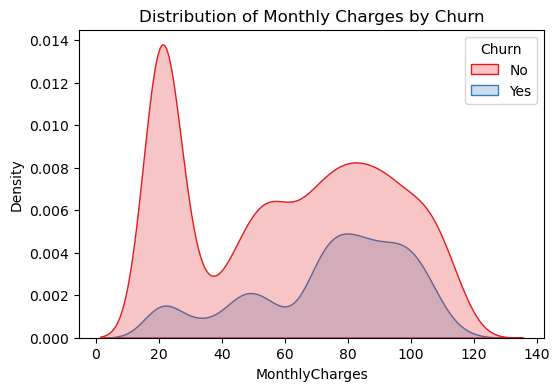

In [40]:

plt.figure(figsize=(6, 4))
sns.kdeplot(data=tc, x='MonthlyCharges', hue='Churn', fill=True, palette='Set1')
plt.title('Distribution of Monthly Charges by Churn')
plt.show()


✅ Low Monthly Charges → Less Churn
Customers paying less (around $20–30) are the least likely to churn.

⚠️ High Monthly Charges → More Churn
Customers paying more (above $70–100) tend to churn more.

💡 Mid-range customers (around $60–80) are a critical group — you have both churned and loyal customers here. This group may churn if they feel value is lacking.

### 📊 **Overall Summary: Telecom Customer Churn Analysis**

#### 🔍 **1. Data Overview**

* The dataset contains customer-level information including demographics, services availed, tenure, charges, and churn status.
* Columns like `TotalCharges` were initially of object type with missing values. I correctly handled this by:

  * Replacing blank spaces with `0`.
  * Converting the column to `float` for numerical analysis.

#### 🧹 **2. Data Cleaning & Preparation**

* Null values: No nulls were found except in `TotalCharges`, which was handled.
* `SeniorCitizen` was mapped from binary (0/1) to `'Yes'` and `'No'` for better readability.
* 
#### 📈 **3. Churn Distribution**

* A count plot of the `Churn` column revealed class imbalance.
* Churned customers are fewer compared to non-churned, indicating a **potential class imbalance problem**.

#### 🧑‍💼 **4. Demographic Insights**

* **Gender**: Churn is almost equally distributed between male and female.
* **Senior Citizens**: Higher churn rate observed among senior citizens.
* **Partner & Dependents**: Customers without partners and dependents are more likely to churn.

#### 💼 **5. Services Analysis**

* **Phone Service & Multiple Lines**: Those without these services have slightly higher churn.
* **Internet-related services**:

  * Customers without online security, backup, or tech support are more likely to churn.
  * Fiber optic users show higher churn than DSL or those with no internet.

#### 💰 **6. Charges and Tenure**

* **Tenure**:

  * Churn is high among customers with low tenure (new users).
* **Monthly Charges**:

  * High monthly charges correlate with a higher churn rate.
* **Total Charges**:

  * Lower total charges (newer customers) have higher churn.

#### 📦 **7. Contract & Billing**

* **Contract Type**:

  * Month-to-month contracts have significantly higher churn.
* **Payment Method**:

  * Electronic check users churn more compared to credit card, bank transfer, or mailed checks.
* **Paperless Billing**: More churn observed in customers using paperless billing.

---

### ✅ **Key Takeaways**

* **New customers** (low tenure) and those on **monthly contracts** are at highest risk of churn.
* Churn correlates strongly with **higher monthly charges**, **lack of additional services**, and **electronic payment methods**.
* **Targeted retention efforts** should focus on:

  * Offering discounts to monthly plan users.
  * Upselling value-added services (security, backup).
  * Improving experience for senior citizens and new users.